<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

#### Import the required libraries

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.cluster import KMeans

#### Read the data

Load the csv file and print the first five observations.

In [129]:
df = pd.read_csv(r"C:\Users\K\Downloads\USL\Take Home\USL - Take home (Day 1) - Questions-1\USL - Take home (Day 1) - Questions\wholesale_cust.csv")
df.head()

,Region,Vegetables,Personal_care,Milk,Grocery,Plasticware
0,Rochester,12667,2674,9656,7561,212
1,Rochester,7058,3293,9810,9568,1757
2,Rochester,6346,3516,8808,7684,2408
3,Rochester,13251,507,1196,4221,6407
4,Rochester,22620,1777,5410,7198,3908


In [130]:
df.shape

(444, 6)

In [131]:
df.isnull().sum()

Region           0
Vegetables       0
Personal_care    0
Milk             0
Grocery          0
Plasticware      0
dtype: int64

**The data definition is as follows:** <br>

**Region**:  City of the retailer

**Vegetables**: Annual spending on vegetables

**Personal_care**: Annual spending on personal care products

**Milk**: Annual spending on milk and milk products

**Grocery**: Annual spending on grocery

**Plasticware**: Annual spending on plasticware (container, bottles, dishes and so on)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is there any retailer whose entry is recorded more than once? If yes, do the needful.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [132]:
df[df.duplicated()]

,Region,Vegetables,Personal_care,Milk,Grocery,Plasticware
30,Rochester,22620,1777,5410,7198,3908
277,Oneonta,2344,1566,10678,3828,1441
317,Albany,10617,857,1795,7647,1478
430,Rochester,31012,439,16687,5429,15087
443,Oneonta,15671,562,5279,2406,555


In [133]:
df[(df['Region'] == 'Rochester')& (df['Vegetables'] == 22620)]

,Region,Vegetables,Personal_care,Milk,Grocery,Plasticware
4,Rochester,22620,1777,5410,7198,3908
30,Rochester,22620,1777,5410,7198,3908


In [134]:
df.drop_duplicates(inplace=True)

In [135]:
df[df.duplicated()]

,Region,Vegetables,Personal_care,Milk,Grocery,Plasticware


In [136]:
df.shape

(439, 6)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Identify the different cities to which the retailers belong. Also, visualize their count in different cities.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [137]:
df['Region'].value_counts()

Rochester    315
Oneonta       77
Albany        47
Name: Region, dtype: int64

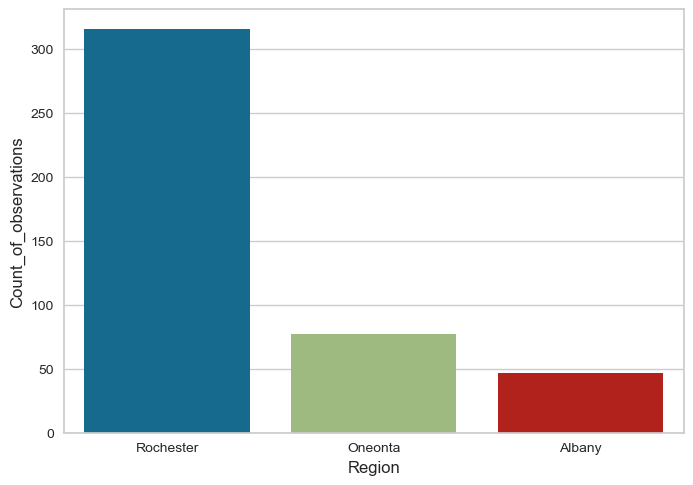

In [138]:
sns.countplot(data=df,x='Region')
plt.xlabel('Region')
plt.ylabel('Count_of_observations')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Identify the extreme observations in the data using a visualization technique. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

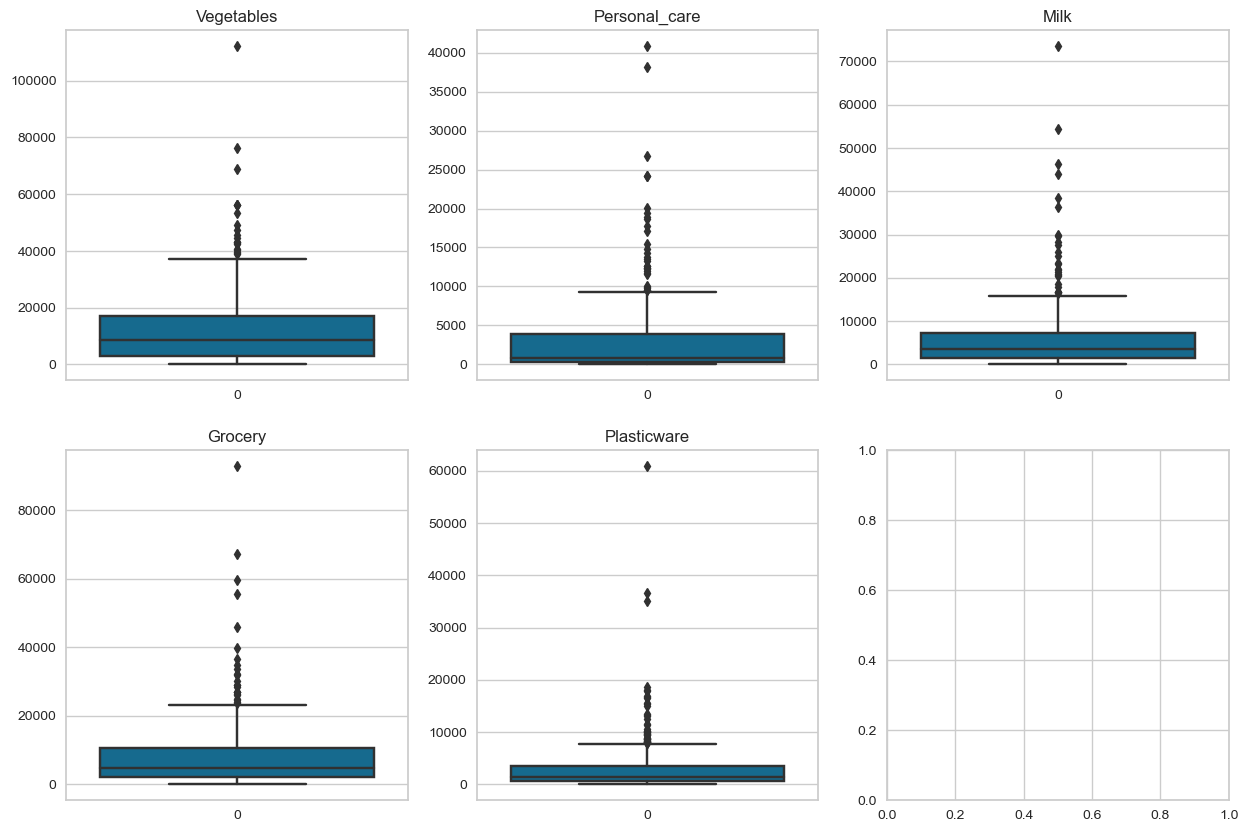

In [123]:
fig,ax = plt.subplots(2,3,figsize=(15,10))
for col,subplot in zip(df.select_dtypes(include=np.number).columns,ax.flatten()):
    sns.boxplot(df[col],ax=subplot)
    subplot.set_title(col)  
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Use the appropriate technique to remove the observations greater than 3*IQR above the third quartile.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [139]:
#num_df = df.select_dtypes(include=np.number)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3-Q1

upper_limit = Q3 + 3 * IQR
o_df= df[~(df>upper_limit).any(axis=1)]

C:\Users\K\AppData\Local\Temp\ipykernel_30144\613298123.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\K\AppData\Local\Temp\ipykernel_30144\613298123.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\K\AppData\Local\Temp\ipykernel_30144\613298123.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  o_df= df[~(df>upper_limit).any(axis=1)]


In [140]:
o_df

,Region,Vegetables,Personal_care,Milk,Grocery,Plasticware
0,Rochester,12667,2674,9656,7561,212
1,Rochester,7058,3293,9810,9568,1757
2,Rochester,6346,3516,8808,7684,2408
3,Rochester,13251,507,1196,4221,6407
4,Rochester,22620,1777,5410,7198,3908
...,...,...,...,...,...,...
437,Rochester,16731,2371,3922,7994,689
439,Rochester,39228,93,1431,764,4504
440,Rochester,14531,14841,15488,30243,433
441,Rochester,10290,168,1981,2232,1033


In [141]:
o_df.isnull().sum()

Region           0
Vegetables       0
Personal_care    0
Milk             0
Grocery          0
Plasticware      0
dtype: int64

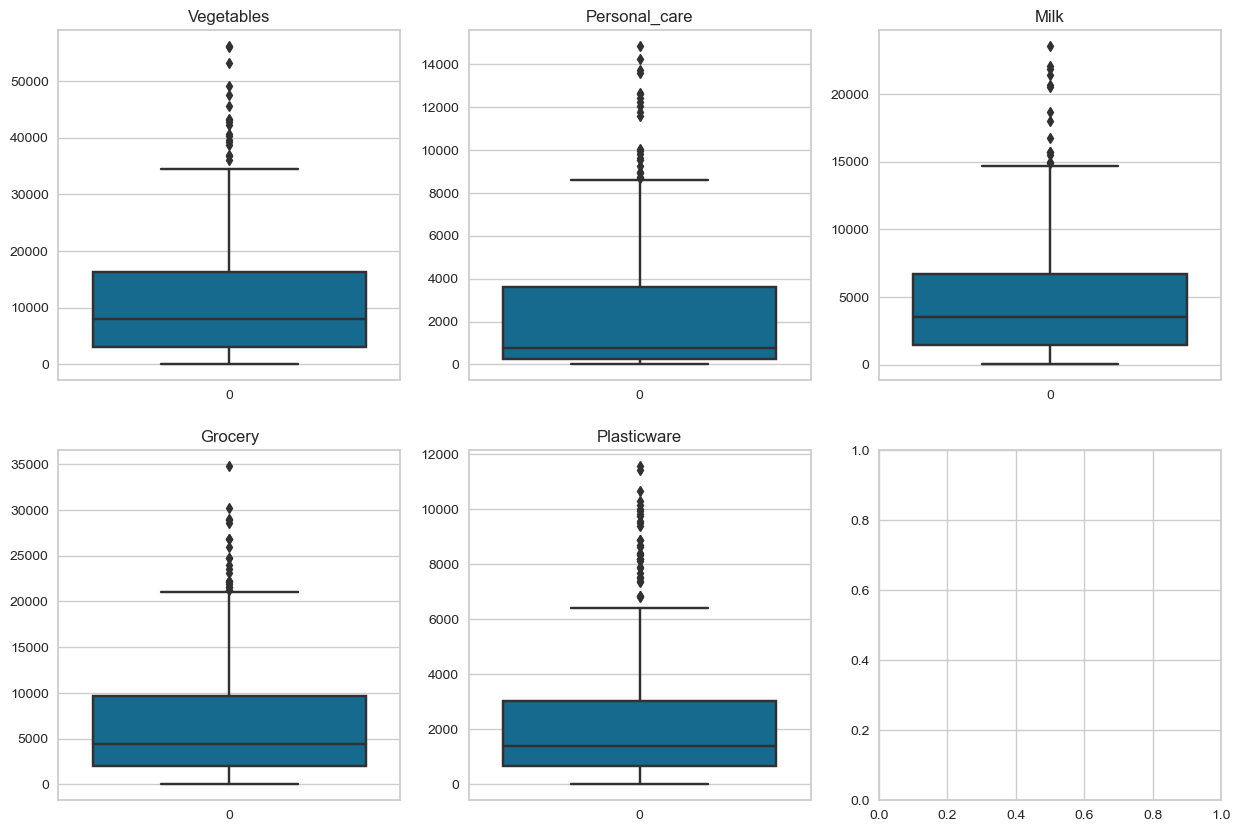

In [142]:
fig,ax = plt.subplots(2,3,figsize=(15,10))
for col,subplot in zip(o_df.select_dtypes(include=np.number).columns,ax.flatten()):
    sns.boxplot(o_df[col],ax=subplot)
    subplot.set_title(col)  
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Transform the numerical variables such that the values will be between 0 and 1.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [145]:
from sklearn.preprocessing import PowerTransformer,StandardScaler

In [147]:
# pt = PowerTransformer()
# transfomed_data = pt.fit_transform(o_df[o_df.select_dtypes(include=np.number).columns])

In [149]:
ss = StandardScaler()
scaled_data = ss.fit_transform(o_df[o_df.select_dtypes(include=np.number).columns])
scaled_data =pd.DataFrame(data=scaled_data,columns=o_df.select_dtypes(include=np.number).columns)

In [150]:
scaled_data

,Vegetables,Personal_care,Milk,Grocery,Plasticware
0,0.147580,0.124814,1.143408,0.133868,-0.868038
1,-0.383171,0.329957,1.179199,0.448288,-0.239939
2,-0.450543,0.403862,0.946327,0.153137,0.024717
3,0.202841,-0.593354,-0.822756,-0.389381,1.650458
4,1.089382,-0.172462,0.156607,0.077000,0.634522
...,...,...,...,...,...
401,0.532136,0.024396,-0.189214,0.201702,-0.674120
402,2.660911,-0.730559,-0.768141,-0.930960,0.876818
403,0.323961,4.157095,2.498807,3.687264,-0.778194
404,-0.077343,-0.705703,-0.640317,-0.700981,-0.534272


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Perform K-Means clustering with varying K from 2 to 4, and identify the optimal number of clusters using the Silhouette plot.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [151]:
from sklearn.metrics import silhouette_score

In [108]:
!pip install yellowbricks

ERROR: Could not find a version that satisfies the requirement yellowbricks (from versions: none)
ERROR: No matching distribution found for yellowbricks


In [152]:
from yellowbrick.cluster import SilhouetteVisualizer

In [156]:
from sklearn.cluster import KMeans

C:\Users\K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\K\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


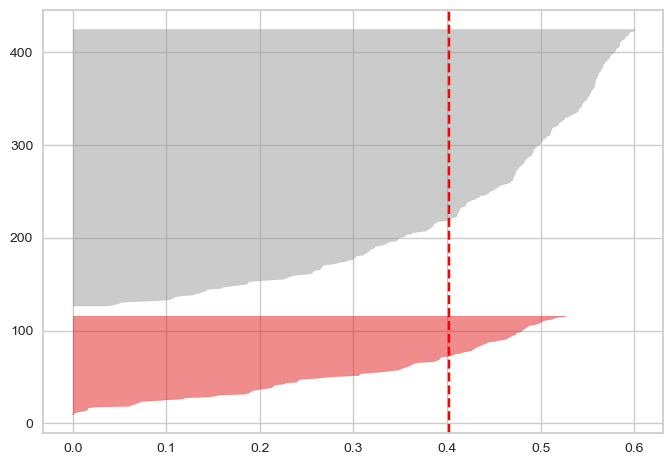

C:\Users\K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\K\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


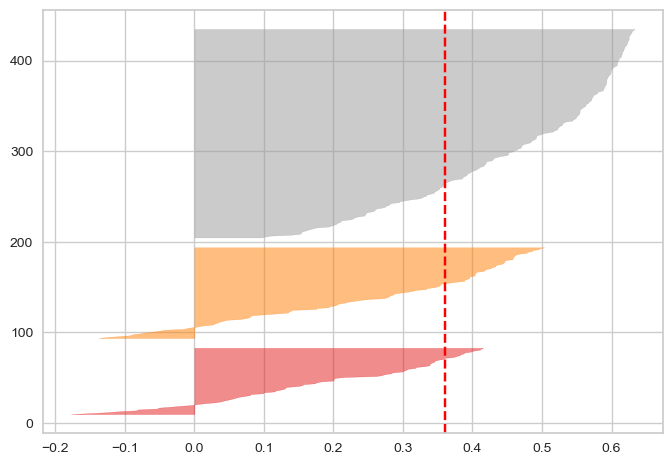

C:\Users\K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\K\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


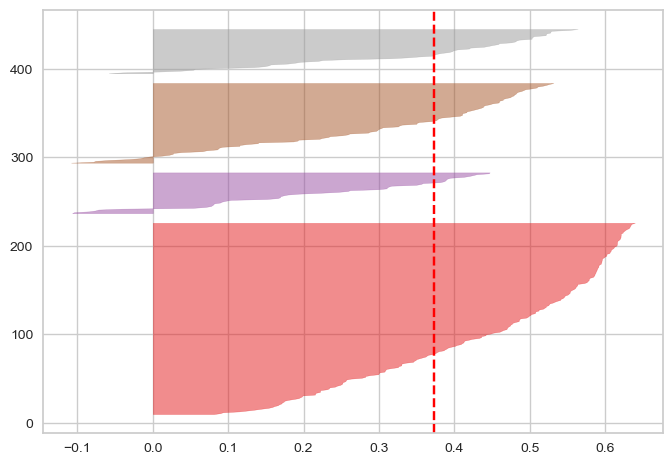

In [159]:
for i in range(2,5):
    model = KMeans(n_clusters = i,random_state = 1)
    model.fit(scaled_data)
    sv = SilhouetteVisualizer(model)
    sv.fit(scaled_data)
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Consider the numerical variables to create two clusters and visualize them using the variables 'Vegetables' and 'Personal_care'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [160]:
model = KMeans(n_clusters = 2,random_state = 1)
model.fit(scaled_data)

C:\Users\K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2, random_state=1)

In [162]:
o_df['labels']=model.labels_

C:\Users\K\AppData\Local\Temp\ipykernel_30144\3451801129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_df['labels']=model.labels_


<Axes: xlabel='Vegetables', ylabel='Personal_care'>

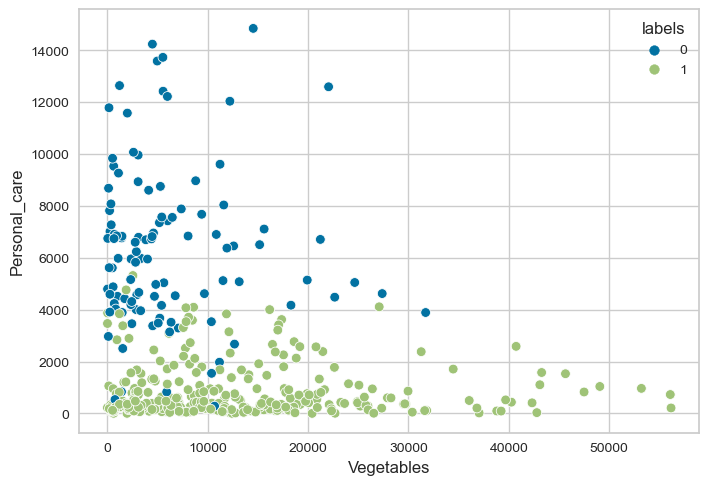

In [165]:
sns.scatterplot(data=o_df,x='Vegetables',y='Personal_care',hue='labels')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Draw insights from the clusters formed in the previous question with respect to each variable in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Vegetables: Annual spending on vegetables

Personal_care: Annual spending on personal care products

person spends higher on vegetables annually doesnt spend much on personal care and vice versa

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Group the retailers from Oneonta into 1 to 5 clusters and find the optimal number of clusters using within cluster sum of squares.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [167]:
Oneonta_df = o_df[o_df['Region']=='Oneonta']

In [168]:
Oneonta_df

,Region,Vegetables,Personal_care,Milk,Grocery,Plasticware,labels
197,Oneonta,2427,4314,7097,10391,1125,0
198,Oneonta,11686,592,2154,6824,3531,1
199,Oneonta,9670,402,2280,2112,520,1
200,Oneonta,3067,9959,13240,23127,3946,0
201,Oneonta,4484,14235,14399,24708,3544,0
...,...,...,...,...,...,...,...
269,Oneonta,11908,6374,8053,19847,1064,0
270,Oneonta,15218,333,258,1138,2518,1
271,Oneonta,4720,197,1032,975,5498,1
272,Oneonta,2083,147,5007,1563,1113,1


In [169]:
err =[]
for i in range(1,6):
    model = KMeans(n_clusters = i,random_state = 1)
    model.fit(scaled_data)
    err.append(model.inertia_)

C:\Users\K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_

In [170]:
err

[2030.0,
 1259.3177202521233,
 959.3616346879305,
 797.7157906441836,
 654.5048531379343]

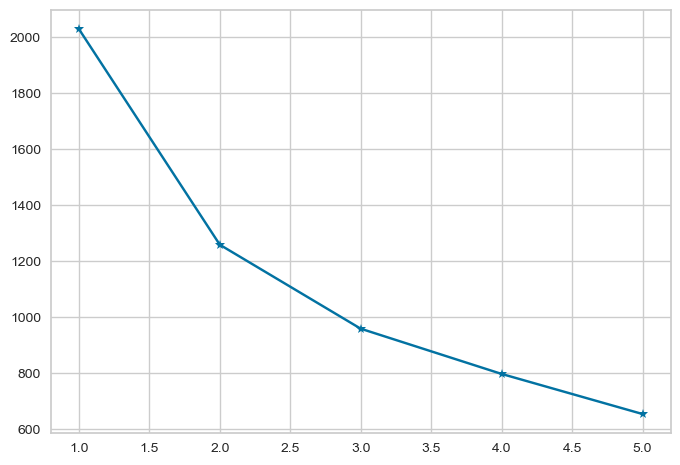

In [172]:
plt.plot(range(1,6),err,marker='*')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Group the retailers from Oneonta into the optimal number of clusters obtained in Q9. Also, find the number of retailers in each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
when cluster =2

In [174]:
ss = StandardScaler()
scaled_data_OneOnta = ss.fit_transform(Oneonta_df[Oneonta_df.select_dtypes(include=np.number).columns])
scaled_data_OneOnta =pd.DataFrame(data=scaled_data_OneOnta,columns=Oneonta_df.select_dtypes(include=np.number).columns)

In [175]:
err =[]
for i in range(1,6):
    model = KMeans(n_clusters = i,random_state = 1)
    model.fit(scaled_data_OneOnta)
    err.append(model.inertia_)

C:\Users\K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_

In [176]:
Oneonta_df['labels']=model.labels_

C:\Users\K\AppData\Local\Temp\ipykernel_30144\1432132895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oneonta_df['labels']=model.labels_


In [177]:
Oneonta_df

,Region,Vegetables,Personal_care,Milk,Grocery,Plasticware,labels
197,Oneonta,2427,4314,7097,10391,1125,3
198,Oneonta,11686,592,2154,6824,3531,1
199,Oneonta,9670,402,2280,2112,520,1
200,Oneonta,3067,9959,13240,23127,3946,2
201,Oneonta,4484,14235,14399,24708,3544,2
...,...,...,...,...,...,...,...
269,Oneonta,11908,6374,8053,19847,1064,2
270,Oneonta,15218,333,258,1138,2518,1
271,Oneonta,4720,197,1032,975,5498,0
272,Oneonta,2083,147,5007,1563,1113,1


In [178]:
Oneonta_df['labels'].value_counts()

1    37
0    13
3    10
2     7
4     6
Name: labels, dtype: int64